In [2]:
import tensorflow as tf 
import tensorflow_hub as tfhub

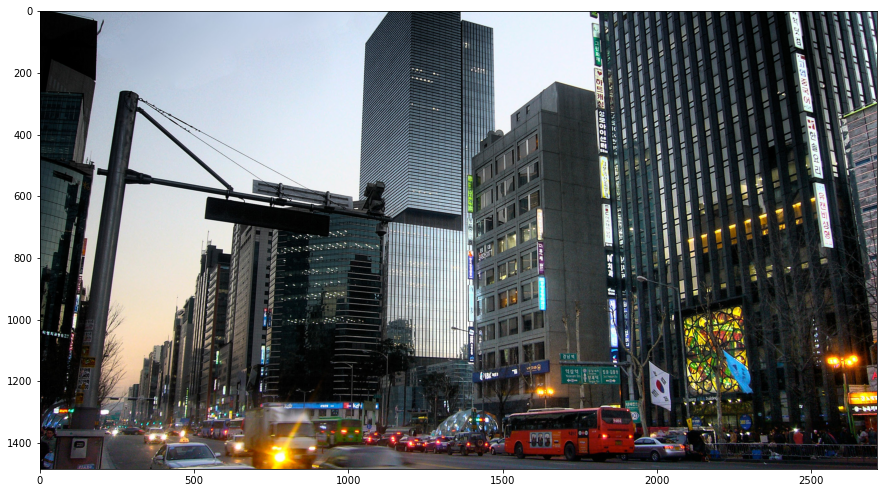

In [5]:
img_path = 'https://upload.wikimedia.org/wikipedia/commons/c/c4/Gangnam_Seoul_January_2009.jpg'
img = tf.keras.utils.get_file(fname='gangnam', origin=img_path)

img = tf.io.read_file(img)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.convert_image_dtype(img,tf.float32)

import matplotlib.pylab as plt
plt.figure(figsize=(15,10))
plt.imshow(img)


In [6]:
img_input = tf.expand_dims(img, 0)
img_input.shape

TensorShape([1, 1484, 2713, 3])

In [7]:
model =  tfhub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [8]:
model.signatures.keys()

KeysView(_SignatureMap({'default': <tensorflow.python.eager.wrap_function.WrappedFunction object at 0x000002E35C9A3E88>}))

In [10]:
obj_detector = model.signatures['default']
obj_detector

In [11]:
result = obj_detector(img_input)
result.keys()

dict_keys(['detection_class_labels', 'detection_scores', 'detection_boxes', 'detection_class_entities', 'detection_class_names'])

In [12]:
len(result["detection_scores"])

100

In [ ]:
boxes = result["detection_boxes"]
labels = result["detection_class_entities"]
scores = result["detection_scores"]

img_height, img_width = img.shape[0], img.shape[1]

obj_to_detect = 10

plt.figure(figsize=(15,10))
for i in range(min(obj_to_detect, boxes.shape[0])):
    if scores[i]>=0.2:
        (ymax,xmin,ymin,xmax) = (boxes[i][0] * img_height, boxes[i][1] * img_width,
                                 boxes[i][2] * img_height, boxes[i][3] * img_width)
        
        plt.imshow(img)
        plt.plot([xmin,xmax,xmax,xmin,xmin],[ymin,ymin,ymax,ymax,ymin],
                 color='yellow',linewidth=2)
        class_name = label[i].numpy().decode('utf-8')
        infer_score = int(scores[i].numpy()*100)
        annotation = "{}:"